# Modeling Telco data with Neural Networks algorithm
Samar Amini, </br>
15 June 2022

In [45]:
import pandas as pd
import numpy as np

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)

import timeit

In [56]:
import warnings
warnings.filterwarnings('ignore')

### Reading train data

In [2]:
df = pd.read_csv('../Data/churn2_train.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1768-ZAIFU,Female,1,No,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,25.20,25.2,Yes
1,2159-TURXX,Male,0,No,No,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Credit card (automatic),20.05,95.55,No
2,8261-GWDBQ,Female,1,Yes,No,60,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),116.05,6925.9,No
3,2732-ISEZX,Female,0,No,No,5,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.50,104.3,No
4,7607-QKKTJ,Male,0,Yes,Yes,45,Yes,Yes,Fiber optic,No,...,Yes,No,No,Yes,One year,Yes,Credit card (automatic),95.00,4368.85,No


### Analysing the dataset

In [4]:
df.shape

(5634, 21)

> #### Dataset (training part) has 5634 datapoints with 21 attributes.

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

- #### Finns det data som ej borde användas?
>  Dropping CustomerID column, since it has no effect on the target.

In [6]:
df = df.drop(['customerID'], axis=1)

#### Looking for Nulls: 

In [7]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### The datatype of column "Totalcharges" is object. But they are actualy float numbers and we need to make them numeric.

In [8]:
df['TotalCharges'] =  pd.to_numeric(df['TotalCharges'], errors='coerce')

#### Again checking for Nulls for this column:

In [9]:
Nulls = pd.isnull(df['TotalCharges'])
df[Nulls]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1832,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
2121,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
2347,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
2651,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
2703,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
3294,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
3999,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
5162,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN,No


#### There are 8 null values and we need to remove them.

In [10]:
df = df.dropna()
df.shape

(5626, 20)

                  Histogram of Total charges


<AxesSubplot:>

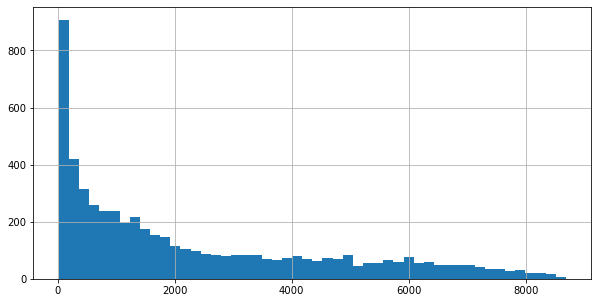

In [11]:
print("                  Histogram of Total charges")
df.TotalCharges.hist(bins=50)

                      Histogram of Churn


<AxesSubplot:>

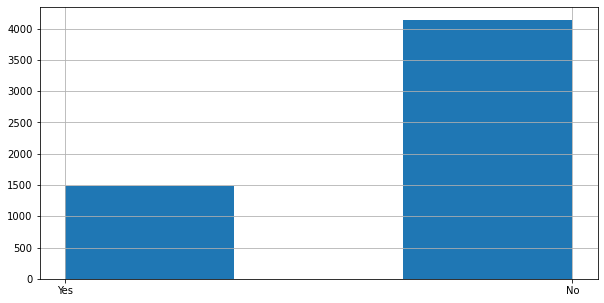

In [12]:
print("                      Histogram of Churn")
df.Churn.hist(bins=3)

#### Encoding Object datatypes to numerics

In [15]:
def encode_attribute(DF, columns):
    LE = LabelEncoder()
    for c in columns:
        LE.fit(DF[c])
        DF[c] = LE.transform(DF[c])
    return DF
    

In [ ]:
def OHencode_attribute(DF, columns):
    OH = OneHotEncoder()
    for c in columns:
        OH.fit(DF[c])
        DF[c] = OH.transform(DF[c])
    return DF

In [16]:
df_orig = df.copy()

In [17]:
toEncode = df.columns.drop(['SeniorCitizen','tenure','MonthlyCharges','TotalCharges'])
encode_attribute(df, toEncode)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,2,25.20,25.20,1
1,1,0,0,0,5,1,0,2,1,1,1,1,1,1,0,0,1,20.05,95.55,0
2,0,1,1,0,60,1,2,1,2,2,2,2,2,2,2,1,0,116.05,6925.90,0
3,0,0,0,0,5,1,0,2,1,1,1,1,1,1,0,1,3,20.50,104.30,0
4,1,0,1,1,45,1,2,1,0,2,2,0,0,2,1,1,1,95.00,4368.85,0


In [18]:
df.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

#### Prepairing Training data:

In [19]:
X_train = df.drop(columns='Churn')
y_train = df['Churn']

### Trainig an XGBoost:

In [35]:
CLF = MLPClassifier(hidden_layer_sizes=(4,5), learning_rate_init=0.01, random_state=42, max_iter=300)

In [36]:
CLF.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(4, 5), learning_rate_init=0.01, max_iter=300,
              random_state=42)

#### Prepairing Test data:

In [22]:
df2 = pd.read_csv('../Data/churn2_test.csv')

In [23]:
df2.shape

(1409, 21)

In [24]:
df2 = df2.drop(['customerID'], axis=1)

In [25]:
df2.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [26]:
df2['TotalCharges'] =  pd.to_numeric(df2['TotalCharges'], errors='coerce')

In [27]:
Nulls = pd.isnull(df2['TotalCharges'])
df2[Nulls]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
765,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No
910,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1190,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No


In [28]:
df2 = df2.dropna()
df2.shape

(1406, 20)

In [29]:
def encode_testdata(DF, columns):
    LE = LabelEncoder()
    for c in columns:
        LE.fit(df_orig[c]) #fit on train data
        LE.transform(df_orig[c])
        DF[c] = LE.transform(DF[c])
    return DF

encode_testdata(df2, toEncode)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,1,3,0,1,0,0,2,0,0,0,2,0,0,3,40.30,92.50,0
1,1,0,0,0,42,1,2,1,0,2,0,0,2,2,0,1,2,101.75,4273.45,1
2,1,0,1,1,43,1,2,1,0,0,2,2,2,2,1,1,1,104.30,4451.85,0
3,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,3,70.60,70.60,0
4,0,0,0,0,9,1,0,0,0,0,0,0,0,0,0,1,0,44.20,403.35,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,1,0,0,0,25,1,0,1,2,0,2,2,2,2,0,1,2,105.50,2686.05,0
1405,0,0,1,1,45,0,1,0,2,0,0,0,2,2,0,1,0,50.90,2333.85,0
1406,1,0,0,0,10,1,0,0,0,0,0,0,0,0,0,1,2,45.55,402.60,1
1407,1,0,1,1,38,1,2,0,0,2,2,0,2,2,1,0,1,78.95,2862.55,0


In [30]:
X_test = df2.drop(columns='Churn').values
y_test = df2['Churn'].values

### Predicting with the test data and geting accuracy score:

In [37]:
Predecit = CLF.predict(X_test)
accuracy_score(y_test, Predecit)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


0.7275960170697012

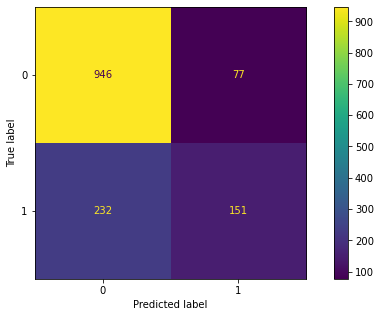

hidden Layers and neurons in each:  (5, 5, 5, 5)
LearningRate:  0.01
runtime:  1.1351990999992267
accuracy:  0.7802275960170697


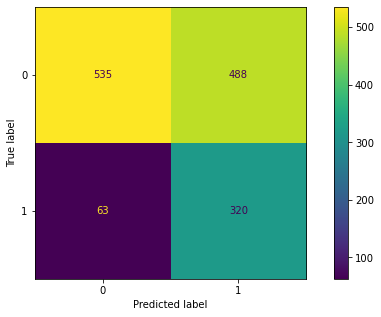

hidden Layers and neurons in each:  (100, 100)
LearningRate:  0.01
runtime:  1.698383400000239
accuracy:  0.6081081081081081


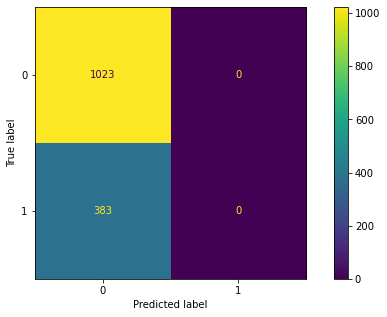

hidden Layers and neurons in each:  (100, 100, 100, 100, 100, 100, 100, 100, 100, 100)
LearningRate:  0.01
runtime:  7.923213699999906
accuracy:  0.7275960170697012


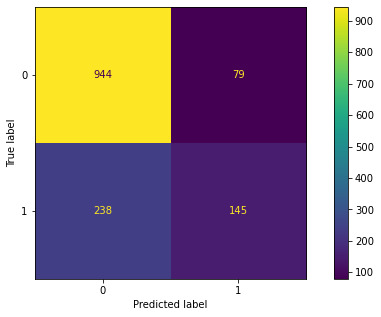

hidden Layers and neurons in each:  (100, 100)
LearningRate:  0.0001
runtime:  1.7905685999994603
accuracy:  0.7745376955903271


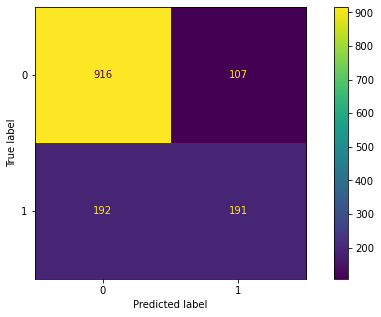

hidden Layers and neurons in each:  (100, 100)
LearningRate:  1e-05
runtime:  14.030281499999546
accuracy:  0.7873399715504978


In [60]:
layers=[(5,5,5,5),(100,100),(100,100,100,100,100,100,100,100,100,100), (100,100), (100,100)]
LearningRates = [0.01, 0.01,0.01,0.0001,0.00001]
times = []
accuracies = []

for l, r in zip(layers,LearningRates):
    start_time = timeit.default_timer()
    
    CLF = MLPClassifier(hidden_layer_sizes=l, learning_rate_init=r, random_state=42, max_iter=300)
    CLF.fit(X_train, y_train)
    Predecit = CLF.predict(X_test)
    acc = accuracy_score(y_test, Predecit)
    accuracies.append(acc)
    
    plot_confusion_matrix(CLF, X_test, y_test)
    plt.show() 
    
    elapsed = timeit.default_timer() - start_time
    print('hidden Layers and neurons in each: ',l)
    print('LearningRate: ',r)
    print('runtime: ',elapsed)
    print('accuracy: ', acc)
    times.append(elapsed)
   

In [61]:
Err = pd.DataFrame()
Err['layers']=layers
Err['LearningRates']=LearningRates
Err['runtime']=times
Err['accuracies']=accuracies
Err

,layers,LearningRates,runtime,accuracies
0,"(5, 5, 5, 5)",0.01000,1.135199,0.780228
1,"(100, 100)",0.01000,1.698383,0.608108
2,"(100, 100, 100, 100, 100, 100, 100, 100, 100, ...",0.01000,7.923214,0.727596
3,"(100, 100)",0.00010,1.790569,0.774538
4,"(100, 100)",0.00001,14.030281,0.787340


#### Utvärdera modellerna
■ Beräkna accuracy </br>
■ Rita ut en confusion matrix och analysera hur modellen gör prediktioner och vilka typer av fel den gör.

- Considering the first three models, with the same Learning rates but different networks, the higher accuracy belongs to the model with 4 layers and 5 neurons which also has the minimum runtime. That means a bigger network is not always better since not only increases the runtime, but also can lead to overfitting. If we look at the confusion matrix of the thrird model (10 layers), the number of predictions for label "1" is zero and the model labels all the data as "0".

- Considering models with the same layers and different learning rates, we see that the accuracy increases significantly from 60.8 to 77.4 by decreasing the learning rate from 0.01 to 0.001 with only 0.1 s change in the runtime. However, decreasing the learning rate to even lower values just slightly changes the accuracy while the runtime increases drastically. In the other words, while a high learning rate can miss the potential solutoin, a very low value can only increase the runtime with no gain.

- Comparing confusion matrix of the first and last models, which own the best accuracies, we see that larger number of layers (not neurons), makes better predictions for label "0", and smaller learning rate improves the predictions for label "1" where we have lack of data there.

- In conclusion we can say that, neigther the larger network nor the lower Learning rate can lead to a better results and there is an optimum value for these variables that needs to be invstigated to get the best fit model. 


End :)